# Figure 13

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
fs = 10
matplotlib.rcParams['font.size']=fs
ms = 6
matplotlib.rcParams['lines.markersize']=ms

In [2]:
from color_utils import get_at2019dge, get_iPTF14gqr, add_source

In [3]:
def bin_specified(xx, yy, eyy, ids):
    uids = np.unique(ids)
    nid = len(uids)
    xs = np.zeros(nid)
    ys = np.zeros(nid)
    eys = np.zeros(nid)
    for i in range(nid):
        myid = uids[i]
        arg = ids == myid
        if np.sum(arg) == 1:
            xs[i] = xx[arg][0]
            ys[i] = yy[arg][0]
            eys[i] = eyy[arg][0]
        else:
            wts = 1 / eyy[arg]**2
            xs[i] = np.sum(xx[arg] * wts) / np.sum(wts)
            ys[i] = np.sum(yy[arg] * wts) / np.sum(wts)
            eys[i] = 1 / np.sqrt(np.sum(wts))
    return xs, ys, eys

In [4]:
def add_19dge(ax):
    tb0 = get_at2019dge(colorplt=True)['ctb']
    ixg0 = tb0["cname"].values=="gmr"
    xx = tb0["phase_rest"].values[ixg0]
    yy = tb0['c'].values[ixg0]
    eyy = tb0['ec'].values[ixg0]
    ids = np.array([0,1,2,3,3,3,4,4,4,5,5,6,6])
    
    xs, ys, eys = bin_specified(xx, yy, eyy, ids)
    color = "k"
    ax.errorbar(xs, ys, 
                eys, fmt='*', color = color, markersize = ms, zorder=5)
    ax.plot(-100,0, '*', color = color, markersize = ms, label = "SN2019dge")
    
    
def add_14gqr(ax1):
    tb4 = get_iPTF14gqr(colorplt = True) 
    ixg4 = tb4["cname"].values=="gmr"
    color = "crimson"
    off4g = 0
    xx = tb4["phase_rest"].values[ixg4]
    yy = tb4['c'].values[ixg4]-off4g
    eyy = tb4['ec'].values[ixg4]
    ids = np.array([0,1,1,2,3,4,5,6,7,8])
    xs, ys, eys = bin_specified(xx, yy, eyy, ids)
    ax1.errorbar(xs, ys, eys, fmt='P', color = color, markersize = ms)
    ax1.plot(-100,0, 'P', color = color, markersize = ms, label = "iPTF14gqr")

In [5]:
def adjust_colorfig(ax1):
    ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax1.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    
    ax1.tick_params(which = 'major', length = 4, top=True, right=True, direction = "in")
    ax1.tick_params(which = 'minor', length = 2, top=True, right=True, direction = "in")

    ymin = -0.8
    ymax = 1.8
    ax1.set_ylim(ymin, ymax)
    
    xmin = -1
    xmax = 42
    ax1.set_xlim(xmin, xmax)

In [6]:
def plot_color_fig():
    xnum = 7.5
    ynum = 7.5
    plt.figure(figsize=(xnum, ynum))
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(223)
    ax4 = plt.subplot(224)
    
    xt1 = 1
    xt2 = 5
    xt3 = 5.5
    
    ax1.text(0, 1.6, "Multi-wavelength", color = "k", weight="bold", fontsize = fs+2)
    ax1.text(6, 1.45, "FBOTs", color = "k", weight="bold", fontsize = fs+2)
    # AT2018cow
    add_source(ax1, "ZTF18abcfcoo")
    # AT2020mrf
    add_source(ax1, "ZTF20abfhyil")
    # AT2018lug
    add_source(ax1, "ZTF18abvkwla")
    # AT2020xnd
    add_source(ax1, "ZTF20acigmel")
    
    ax1.legend(ncol = 1, loc = "upper right")
    
    # AT2020xnd
    
    # =========================================================================
    # SNe Icn
    ax2.plot([xt1, xt2], [1.65, 1.65], color = "gray", linestyle = "--", linewidth = 0.75)
    ax2.text(xt3, 1.6, "SNe Icn", weight="bold")
    add_source(ax2, "ZTF21aakilyd")
    add_source(ax2, "ZTF19aayejww")
    
    # SN Ibn
    ax2.plot([xt1, xt2], [1.5, 1.5], color = "gray", linestyle = ":", linewidth = 0.8)
    ax2.text(xt3, 1.45, "SNe Ibn", weight="bold")
    add_source(ax2, "ZTF18aakuewf")
    add_source(ax2, "ZTF19aakssbm")
    add_source(ax2, "ZTF19aapfmki")
    add_source(ax2, "ZTF19abobxik")
    add_source(ax2, "ZTF19abuvqgw")
    add_source(ax2, "ZTF19acayojs")
    
    # SN Ibn/IIn
    ax2.plot([xt1, xt2], [1.35, 1.35], color = "gray", linestyle = "-", linewidth = 0.7)
    ax2.text(xt3, 1.3, "SN Ibn/IIn", weight="bold")
    add_source(ax2, "ZTF19abyjzvd")
    
    ax2.legend(ncol = 2, loc = "upper right", handletextpad=-0.1, columnspacing=1)
    
    
    # =========================================================================
    # SN IIb
    ax3.plot([xt1, xt2], [1.65, 1.65], color = "gray", linestyle = ":", linewidth = 0.8)
    ax3.text(xt3, 1.6, "SNe IIb", weight="bold")
    add_source(ax3, "ZTF18abwkrbl")
    add_source(ax3, "ZTF19accjfgv")
    add_source(ax3, "ZTF20aahfqpm")
    add_source(ax3, "ZTF20aaxhzhc")
    add_source(ax3, "ZTF20aburywx")
    add_source(ax3, "ZTF20aclfmwn")
    
    # SN Ib
    ax3.plot([xt1, xt2], [1.5, 1.5], color = "gray", linestyle = "-", linewidth = 0.7)
    ax3.text(xt3, 1.45, "SNe Ib", weight="bold")
    add_source(ax3, "ZTF18abfcmjw")
    add_source(ax3, "ZTF18abvkmgw")

    ax3.legend(ncol = 2, loc = "lower right", handletextpad=-0.1, columnspacing=1)
    
    # =========================================================================
    
    # SN II
    ax4.plot([xt1, xt2], [1.65, 1.65], color = "gray", linestyle = ":", linewidth = 0.8)
    ax4.text(xt3, 1.6, "SNe II", weight="bold")
    add_source(ax4, "ZTF20aayrobw")
    add_source(ax4, "ZTF20aazchcq")
    add_source(ax4, "ZTF20abjbgjj")
    add_source(ax4, "ZTF20acigusw")
    
    # SN Ic
    ax4.plot([xt1, xt2], [1.5, 1.5], color = "gray", linestyle = "--", linewidth = 0.75)
    ax4.text(xt3, 1.45, "SN Ic", weight="bold")
    add_source(ax4, "ZTF20aaelulu")
    
    # SN Ic-BL
    ax4.plot([xt1, xt2], [1.35, 1.35], color = "gray", linestyle = "-", linewidth = 0.7)
    ax4.text(xt3, 1.3, "SN Ic-BL", weight="bold")
    add_source(ax4, "ZTF18abukavn")

    ax4.legend(ncol = 2, loc = "lower right", handletextpad=-0.1, columnspacing=1)
 
    adjust_colorfig(ax1)
    adjust_colorfig(ax2)
    adjust_colorfig(ax3)
    adjust_colorfig(ax4)
    
    ax2.set_yticklabels([])
    ax4.set_yticklabels([])
    
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    
    ax1.set_ylabel("$g-r$ (mag)", fontsize=fs)
    ax3.set_ylabel("$g-r$ (mag)", fontsize=fs)
    
    ax3.set_xlabel("Rest-frame days since explosion", fontsize=fs)
    ax4.set_xlabel("Rest-frame days since explosion", fontsize=fs)
    
    plt.tight_layout(h_pad = -0., w_pad = -0., 
                     rect = (-0.01, -0.01, 1.01, 1.01))

ZTF Select seeing < 4 --> remove 1.79 percent of data
ZTF Select scisigpix < 25 --> remove 1.00 percent of data
ZTF Select infobitssci == 0 --> remove 3.50 percent of data
Perform ZTF baseline correction
fcqfid = 5841511, nobs = 20 --> Fpsf mean = -496807119427.59 +- 6657731964.16 e-9 chi2_red = 1.59
             Ref building mjd: 58203 -- 58306
Performing offset correction...
Performing scaling correction...
fcqfid = 5841512, nobs = 20 --> Fpsf mean = -32005802680.58 +- 7517174883.72 e-9 chi2_red = 9.80
             Ref building mjd: 58158 -- 58243
Performing offset correction...
Performing scaling correction...
fcqfid = 5841513, nobs = 9 --> Fpsf mean = -238760292101.81 +- 10525885969.32 e-9 chi2_red = 2.70
             Ref building mjd: 58228 -- 58363
Performing offset correction...
Performing scaling correction...

Loading photometry from other facilities...
243 rows loaded!
explosion mjd = 58285.0, z = 0.0141
bounds:  [58285 58286 58287 58288 58289 58290 58291 58292 58293 58294 58


Loading photometry from other facilities...
5 rows loaded!
explosion mjd = 58870.0, z = 0.0311
bounds:  [58870 58871 58872 58873 58876 58877 58879 58880 58882 58885 58890 58893
 58897 58901 58902 58907 58915]
10 nulls
ZTF Select seeing < 4 --> remove 2.82 percent of data
ZTF Select scisigpix < 25 --> remove 1.20 percent of data
ZTF Select infobitssci == 0 --> remove 2.25 percent of data

Loading photometry from other facilities...
6 rows loaded!
explosion mjd = 58966.0, z = 0.0420
bounds:  [58966 58967 58968 58969 58970 58971 58972 58973 58974 58975 58976 58977
 58978 58979 58980 58981 58982 58983 58984 58985 58986 58987 58988 58989
 58990 58991 58992 58993 58994 58995 58996 58997 58998 58999 59000 59001
 59002 59003 59004 59005 59006 59007 59008 59009 59010 59011 59012 59013
 59014 59015 59016 59017 59018 59019 59020 59021 59022 59023 59024 59035
 59045]
ZTF Select seeing < 4 --> remove 1.39 percent of data
ZTF Select scisigpix < 25 --> remove 1.20 percent of data
ZTF Select infobits

2 nulls
ZTF Select seeing < 4 --> remove 1.07 percent of data
ZTF Select scisigpix < 25 --> remove 1.12 percent of data
ZTF Select infobitssci == 0 --> remove 1.60 percent of data

Loading photometry from other facilities...
110 rows loaded!
explosion mjd = 58370.0, z = 0.0315
bounds:  [58370 58371 58372 58373 58374 58375 58376 58377 58378 58379 58380 58381
 58382 58383 58384 58385 58386 58387 58388 58389 58390 58391 58392 58393
 58394 58395 58396 58397 58398 58399 58400 58401 58402 58403 58404 58410
 58422]


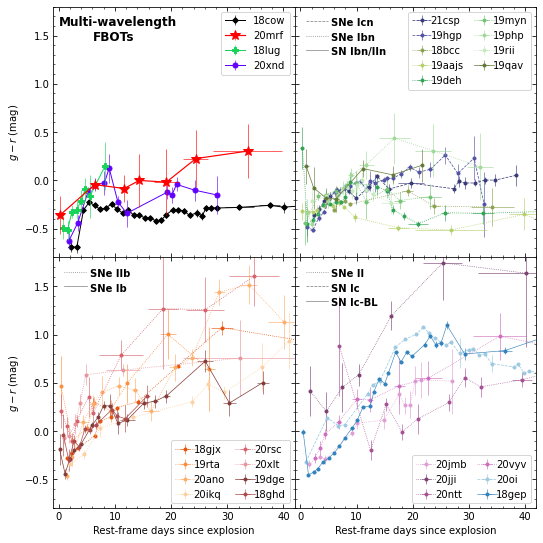

In [7]:
plot_color_fig()